In [1]:
import json
import pandas as pd

from collections import deque
from matplotlib import pyplot as plt

In [2]:
graph = None

with open('../results/unweighted_graph.json', 'r') as f:
    graph = json.load(f)

# Graph Properties

In [12]:
with open('../cpae/data/en_wn_full/all.json') as f:
    blah = json.load(f)
    
count_he = 0
count_she = 0
for k,v in blah.items():
    v = v[0]
    if 'he' in v and 'she' not in v:
        count_he += 1
        print(k, ':', ' '.join(v))
    if 'she' in v and 'he' not in v:
        count_she += 1
print(count_he, count_she)

Hamilton : English beauty who was the mistress of Admiral Nelson ( 1765-1815 ) <sep> the capital of Bermuda <sep> United States toxicologist known for her work on industrial poisons ( 1869-1970 ) <sep> Irish mathematician ( 1806-1865 ) <sep> a port city in southeastern Ontario at the western end of Lake Ontario <sep> United States statesman and leader of the Federalists ; as the first Secretary of the Treasury he establish a federal bank ; was mortally wounded in a duel with Aaron Burr ( 1755-1804 )
Clytemnestra : ( Greek mythology ) wife of Agamemnon who had him murdered when he returned from the Trojan War
Harvey : English physician and scientist who described the circulation of the blood ; he later proposed that all animals originate from an ovum produced by the female of the species ( 1578-1657 )
Laurentius : Roman martyr ; supposedly Lawrence was ordered by the police to give up the church 's treasure and when he responded by presenting the poor people of Rome he was roasted to de

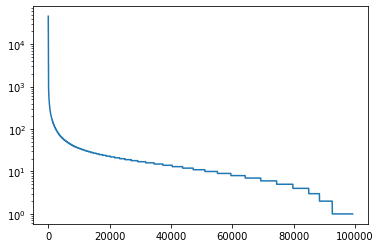

In [3]:
lens = [len(s) for s in graph.values()]

plt.yscale('log')
plt.plot(sorted(lens, reverse=True))

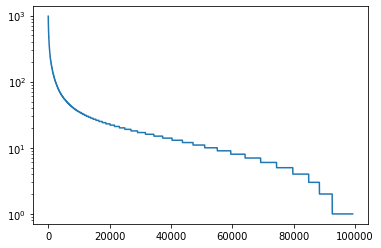

In [4]:
plt.yscale('log')
plt.plot(sorted(lens, reverse=True)[100:])

In [5]:
def remove_words(graph, to_remove):
    cleaned_graph = {}
    for k,v in graph.items():
        if k in to_remove:
            continue
        cleaned_graph[k] = set()
        for vv in v:
            if vv in to_remove:
                continue
            cleaned_graph[k].add(vv)
    return cleaned_graph

In [13]:
to_remove = set([k for k,v in graph.items() if len(v) > 1000])
print(len(to_remove))
print(to_remove)
cleaned_graph = remove_words(graph, to_remove)
print(len(cleaned_graph))

96
{'form', 'relating', 'more', 'two', 'light', 'is', 'as', ')', 'resembling', '<sep>', 'but', 'people', 'make', 'made', 'if', 'that', 'group', 'city', 'into', 'out', 'water', ':', 'other', 'can', 'up', 'by', 'some', 'usually', 'someone', 'it', 'for', 'family', 'which', 'of', 'long', 'than', 'used', 'small', 'give', 'member', 'being', 'on', 'are', 'through', 'with', 'cause', 'or', 'something', 'state', 'from', 'who', 'language', 'to', 'order', 'any', 'American', 'having', 'an', ',', 'not', 'have', 'its', 'a', 'act', 'flowers', 'especially', 'the', "'s", 'become', 'at', 'consisting', 'quality', 'manner', 'and', 'States', 'characteristic', 'part', 'between', 'time', 'be', 'over', 'genus', 'often', 'in', 'body', 'United', ';', 'has', '(', 'place', 'large', 'person', 'one', 'another', 'use', 'without'}
99183


In [7]:
proper_words = set([k for k in cleaned_graph.keys() if k[0].isupper()])
print(len(proper_words))
cleaner_graph = remove_words(cleaned_graph, proper_words)
print(len(cleaner_graph))

assert(all(not k[0].isupper() for k in cleaner_graph))

17079
82104


In [36]:
pronoun_graph = {}
mismatched_items = set()
for k,v in cleaner_graph.items():
    pronoun_graph[k] = set()
    for vv in v:
        pronoun_graph[k].add(vv)
    if 'he' in pronoun_graph[k] and 'she' not in pronoun_graph[k]:
        mismatched_items.add(k)
        pronoun_graph[k].add('she')
    if 'his' in pronoun_graph[k] and 'her' not in pronoun_graph[k]:
        mismatched_items.add(k)
        pronoun_graph[k].add('her')
print(len(mismatched_items))
print('\n'.join(mismatched_items))

267
men
covering
lobsterback
honker
dandy
exchange
eas
faro
know-all
parable
spitter
drawing
cachet
boorishly
ponce
deputy
outlier
dealer
scissors
hawker
elder
dotard
renegade
court
brainworker
inmate
older
imprisoned
estate
acknowledge
mills
al-Qur'an
househusband
cummings
swagger
archidiaconal
brethren
tag
swaggie
quarterback
dimensional
cataphatism
payoff
recognised
inpatient
corner
sphinx
peanut
quarter
treasonist
recognized
plagiariser
know
crony
groom
redcoat
dude
defalcator
cornered
confession
libel
demesne
frogmarch
groveller
brokerage
pedlar
halberdier
tontine
younger
inspirationally
shirker
pyrrhic
ark
addiction
covered
wittol
slobberer
exemption
chum
bigot
driven
tree
broker-dealer
spitball
bridegroom
bribe
aggressive
palatine
hide-and-seek
apostate
impressed
fawner
hangover
indorser
adequateness
beard
truckler
quartering
douglass
gallant
wingman
drawn
drive
cockscomb
instead
consular
repatriate
swagman
yeoman
de-Stalinisation
cuckoo
boxer
quid
contrariwise
putt
pitchman
qua

# Graph Search

In [8]:
def dfs(graph, curr, dst, visited, length):
    if curr == dst:
        return [[]]
    if curr in visited or length <= 0:
        return []
    
    to_ret = []
    for neighbor in graph[curr]:
        new_visited = visited | set([curr])
        if neighbor in visited:
            continue
        to_ret += [[neighbor] + a for a in dfs(graph, neighbor, dst, new_visited, length-1)]
    return to_ret

In [9]:
assert(len(dfs(graph, 'algebra', 'she', set(), 3)) == len(dfs(graph, 'she', 'algebra', set(), 3)))

In [10]:
def bfs(graph, src, dst, max_len):
    q = deque([src])
    visited = {src: (0, 1)}
    
    while q:
        curr = q.popleft()
        curr_len, count = visited[curr]
        
        if dst == curr:
            return (curr_len, count)
        
        if curr_len >= max_len:
            break
        
        for neighbor in graph[curr]:
            if neighbor not in visited:
                visited[neighbor] = (curr_len+1, count)
            elif visited[neighbor][0] == curr_len:
                visited[neighbor][1] += count
            else:
                continue
            
            q.append(neighbor)
            
    return (None, None)

# Pairwise Evaluation

In [11]:
with open('../results/weat.json') as fin:
    weat_words = json.load(fin)

math_male = set(weat_words['Math_Arts_Male_Female']['Male attributes'])
science_male = set(weat_words['Science_Arts_Male_Female']['Male attributes'])
male_words = math_male.union(science_male)

math_female = set(weat_words['Math_Arts_Male_Female']['Female attributes'])
science_female = set(weat_words['Science_Arts_Male_Female']['Female attributes'])
female_words = math_female.union(science_female) 

math_arts = set(weat_words['Math_Arts_Male_Female']['Arts Words'])
science_arts = set(weat_words['Science_Arts_Male_Female']['Arts words'])
arts_words = math_arts.union(science_arts)
science_words = set(weat_words['Science_Arts_Male_Female']['Science words'])
math_words = set(weat_words['Math_Arts_Male_Female']['Math words'])

female_words.remove('hers')
math_female.remove('hers')
science_female.remove('hers')

word_lists = {
    'male': male_words,
    'math': math_words,
    'science': science_words,
    'arts': arts_words,
    'female': female_words,
    'm1': math_male,
    'm2': science_male,
    'f1': math_female,
    'f2': science_female,
    'a1': math_arts,
    'a2': science_arts,
}
print(word_lists)

{'male': {'son', 'father', 'grandfather', 'male', 'he', 'uncle', 'boy', 'man', 'brother', 'him', 'his'}, 'math': {'numbers', 'algebra', 'equations', 'addition', 'calculus', 'geometry', 'computation', 'math'}, 'science': {'astronomy', 'biology', 'technology', 'physics', 'science', 'experiment', 'chemistry'}, 'arts': {'dance', 'poetry', 'drama', 'novel', 'art', 'sculpture', 'literature', 'symphony'}, 'female': {'her', 'she', 'female', 'daughter', 'woman', 'girl', 'sister', 'grandmother', 'aunt', 'mother'}, 'm1': {'son', 'male', 'he', 'boy', 'man', 'brother', 'him', 'his'}, 'm2': {'son', 'father', 'grandfather', 'uncle', 'he', 'brother', 'him', 'his'}, 'f1': {'her', 'she', 'female', 'daughter', 'woman', 'girl', 'sister'}, 'f2': {'her', 'she', 'daughter', 'sister', 'grandmother', 'aunt', 'mother'}, 'a1': {'dance', 'poetry', 'drama', 'novel', 'art', 'sculpture', 'literature', 'symphony'}, 'a2': {'dance', 'poetry', 'drama', 'novel', 'art', 'sculpture', 'literature', 'symphony'}}


In [12]:
def pairwise_counts(graph, l1, l2):
    c = {}
    for w1 in word_lists[l1]:
        print(w1)
        c[w1] = {}
        for w2 in word_lists[l2]:
            c[w1][w2] = len(dfs(graph, w1, w2, set(), 3))
            
    return c

def pairwise_mult(graph, ls1, ls2):
    return {l1: {l2: pd.DataFrame.from_dict(pairwise_counts(graph, l1, l2)) for l2 in ls2} for l1 in ls1}

## Cleaned Graph (remove top 96 words)

In [14]:
math_nums = pairwise_mult(cleaned_graph, ['math', 'a1'], ['m1', 'f1'])

numbers
algebra
equations
addition
calculus
geometry
computation
math
numbers
algebra
equations
addition
calculus
geometry
computation
math
dance
poetry
drama
novel
art
sculpture
literature
symphony
dance
poetry
drama
novel
art
sculpture
literature
symphony


In [15]:
science_nums = pairwise_mult(cleaned_graph, ['science', 'a2'], ['m2', 'f2'])

astronomy
biology
technology
physics
science
experiment
chemistry
astronomy
biology
technology
physics
science
experiment
chemistry
dance
poetry
drama
novel
art
sculpture
literature
symphony
dance
poetry
drama
novel
art
sculpture
literature
symphony


In [16]:
(math_nums['math']['f1'].sum() / math_nums['math']['m1'].sum()).mean()

0.4171680795737337

In [17]:
(math_nums['a1']['f1'].sum()/(math_nums['a1']['m1'].sum())).mean()

0.36216331944050556

In [18]:
(science_nums['science']['f2'].sum()/(science_nums['science']['m2'].sum())).mean()

0.3681669622890379

In [19]:
(science_nums['a2']['f2'].sum()/(science_nums['a2']['m2'].sum())).mean()

0.3213791020220429

## Cleaner Graph (+ remove "proper" nouns)

In [21]:
math_nums = pairwise_mult(cleaner_graph, ['math', 'a1'], ['m1', 'f1'])

numbers
algebra
equations
addition
calculus
geometry
computation
math
numbers
algebra
equations
addition
calculus
geometry
computation
math
dance
poetry
drama
novel
art
sculpture
literature
symphony
dance
poetry
drama
novel
art
sculpture
literature
symphony


In [22]:
science_nums = pairwise_mult(cleaner_graph, ['science', 'a2'], ['m2', 'f2'])

astronomy
biology
technology
physics
science
experiment
chemistry
astronomy
biology
technology
physics
science
experiment
chemistry
dance
poetry
drama
novel
art
sculpture
literature
symphony
dance
poetry
drama
novel
art
sculpture
literature
symphony


In [23]:
(math_nums['math']['f1'].sum() / math_nums['math']['m1'].sum()).mean()

0.4581083623690497

In [24]:
(math_nums['a1']['f1'].sum()/(math_nums['a1']['m1'].sum())).mean()

0.48580117406687806

In [25]:
(science_nums['science']['f2'].sum()/(science_nums['science']['m2'].sum())).mean()

0.5161796879190544

In [26]:
(science_nums['a2']['f2'].sum()/(science_nums['a2']['m2'].sum())).mean()

0.4718169807373638

## Pronoun Graph

In [35]:
math_nums = pairwise_mult(pronoun_graph, ['math', 'a1'], ['m1', 'f1'])
science_nums = pairwise_mult(pronoun_graph, ['science', 'a2'], ['m2', 'f2'])
print((math_nums['math']['f1'].sum() / math_nums['math']['m1'].sum()).mean())
print((math_nums['a1']['f1'].sum()/(math_nums['a1']['m1'].sum())).mean())
print((science_nums['science']['f2'].sum()/(science_nums['science']['m2'].sum())).mean())
print((science_nums['a2']['f2'].sum()/(science_nums['a2']['m2'].sum())).mean())

numbers
algebra
equations
addition
calculus
geometry
computation
math
numbers
algebra
equations
addition
calculus
geometry
computation
math
dance
poetry
drama
novel
art
sculpture
literature
symphony
dance
poetry
drama
novel
art
sculpture
literature
symphony
astronomy
biology
technology
physics
science
experiment
chemistry
astronomy
biology
technology
physics
science
experiment
chemistry
dance
poetry
drama
novel
art
sculpture
literature
symphony
dance
poetry
drama
novel
art
sculpture
literature
symphony
0.6424120540168705
0.7230399176997947
0.9589148625635426
0.9173923772478517


In [38]:
math_nums = pairwise_mult(graph, ['math', 'a1'], ['m1', 'f1'])
science_nums = pairwise_mult(graph, ['science', 'a2'], ['m2', 'f2'])
print((math_nums['math']['f1'].sum() / math_nums['math']['m1'].sum()).mean())
print((math_nums['a1']['f1'].sum()/(math_nums['a1']['m1'].sum())).mean())
print((science_nums['science']['f2'].sum()/(science_nums['science']['m2'].sum())).mean())
print((science_nums['a2']['f2'].sum()/(science_nums['a2']['m2'].sum())).mean())

numbers
algebra
equations
addition
calculus
geometry
computation
math
numbers
algebra
equations
addition
calculus
geometry
computation
math
dance
poetry
drama
novel
art
sculpture
literature
symphony
dance
poetry
drama
novel
art
sculpture
literature
symphony
astronomy
biology
technology
physics
science
experiment
chemistry
astronomy
biology
technology
physics
science
experiment
chemistry
dance
poetry
drama
novel
art
sculpture
literature
symphony
dance
poetry
drama
novel
art
sculpture
literature
symphony
0.5708007851791435
0.5634364295326919
0.5012910419761976
0.43714324314716513
